<a href="https://colab.research.google.com/github/prathameshsoonad/Machine-learning/blob/main/assignment_prathamesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The predicted height of a male is: 69.03680006100001
The predicted height of a female is: 63.70379224850001


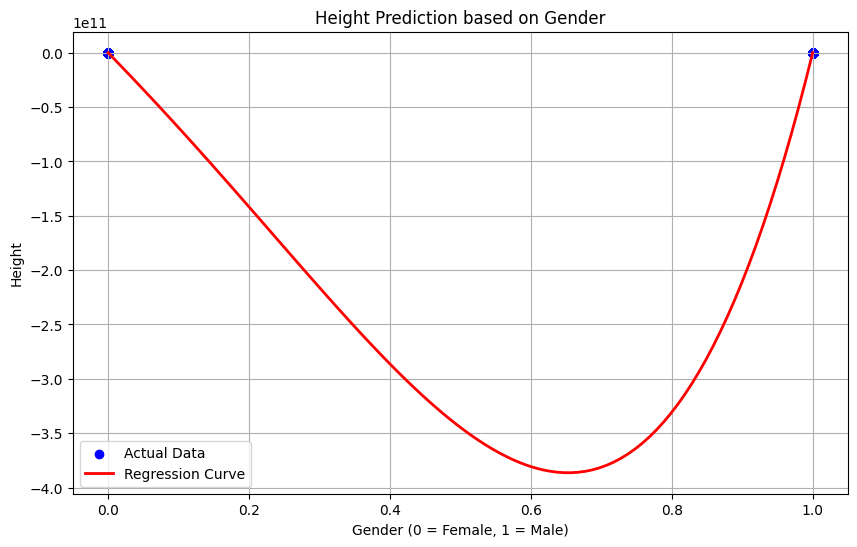

In [ ]:
#5.Write a python code to predict the Height of Male and Female living in a locality
#using a non-linear fourth order polynomial regression model based on the data given
#(heights.csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/content/heights - heights.csv')  # Adjust the path as per your file location

# Assuming the dataset structure is like:
# Column 1: Gender (Categorical: Male/Female)
# Column 2: Height (Numeric)

# Separate the independent (X) and dependent (y) variables
X = data.iloc[:, 0].values  # Gender column
y = data.iloc[:, 1].values  # Height column

# Encode categorical variable 'Gender' into numeric values
label_encoder = LabelEncoder()
X = label_encoder.fit_transform(X)  # Male: 1, Female: 0

# Reshape X to be a 2D array (required by scikit-learn functions)
X = X.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Transform the independent variable to polynomial features
poly_reg = PolynomialFeatures(degree=4)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Predict the height of a male and female using the trained model
# Example: Male is represented as 1, Female as 0 after label encoding
new_height_male = regressor.predict(poly_reg.transform([[1]]))
new_height_female = regressor.predict(poly_reg.transform([[0]]))

print(f"The predicted height of a male is: {new_height_male[0]}")
print(f"The predicted height of a female is: {new_height_female[0]}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Predictions for the regression line
X_fit = np.linspace(0, 1, 100).reshape(-1, 1)
y_fit = regressor.predict(poly_reg.transform(X_fit))

# Plot the regression line
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression Curve')

plt.title('Height Prediction based on Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()


Model Evaluation:
---------------
R^2 Score: 0.988169515729126
Root Mean Squared Error (RMSE): 3580.979237321343


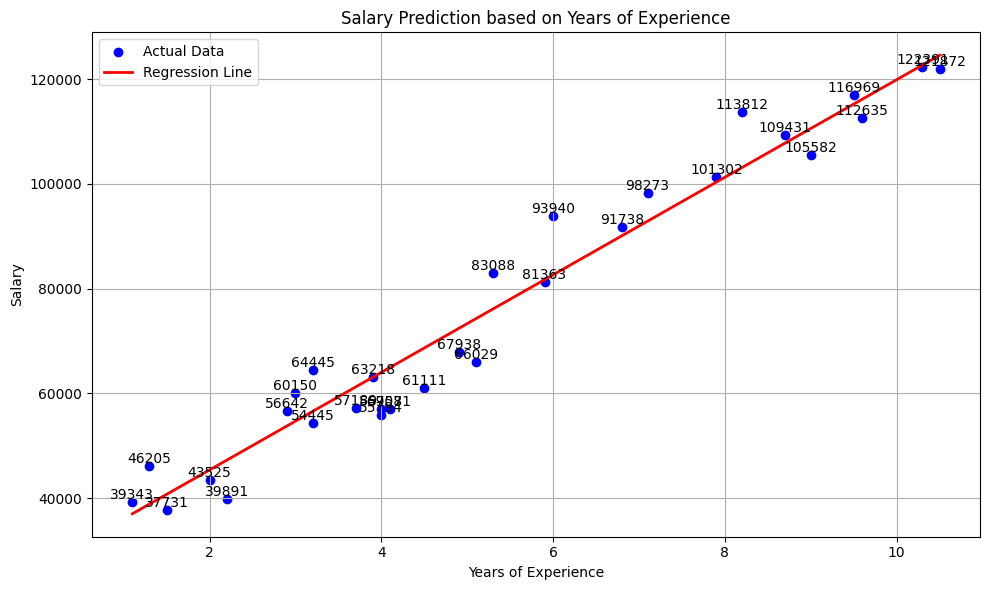

In [ ]:
#1.Write a python code to predict the salary of an employee using linear regression
#based on the data given (salary_info.csv).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('/content/Salary_info - Salary_info (1).csv')

# Assuming the dataset structure is like:
# Column 1: YearsExperience (Independent variable)
# Column 2: Salary (Dependent variable)

# Separate the independent (X) and dependent (y) variables
X = data.iloc[:, :-1].values  # YearsExperience
y = data.iloc[:, -1].values  # Salary

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
print("Model Evaluation:")
print("---------------")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Salary Prediction based on Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Add annotations for a few data points
for i in range(len(X)):
    plt.text(X[i], y[i], f'{y[i]}', ha='center', va='bottom', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


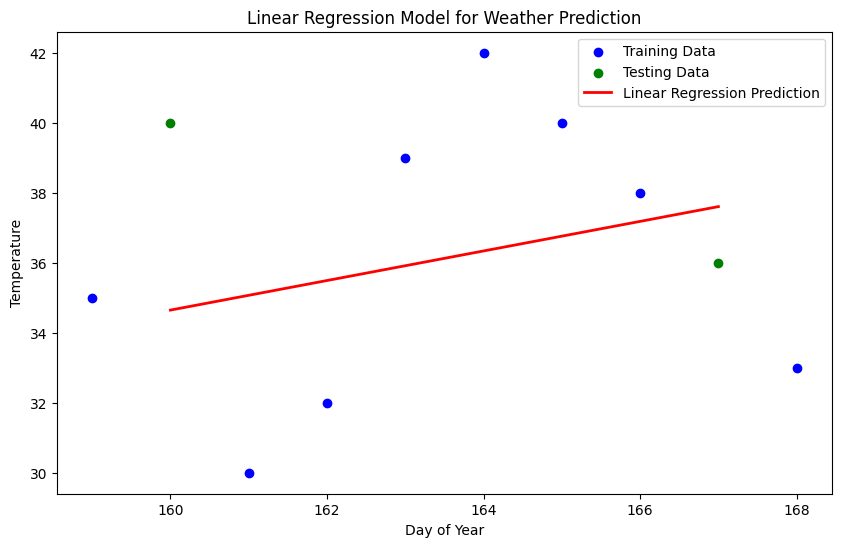

Model Coefficients: [0.42241379]
Model Intercept: -32.93965517241382
Mean Squared Error: 15.615227407847765
R-squared Score: -2.9038068519619413


In [ ]:
#2.Write a python code to predict the weather for the city of Bengaluru using linear
#regression model based on the data given (weather_data.csv).
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/weather_data - weather_data.csv'
weather_data = pd.read_csv(file_path)

# Convert the date column to datetime format
weather_data['x'] = pd.to_datetime(weather_data['x'], format='%d/%m/%y')

# Extract numerical features from the date (e.g., day of the year)
weather_data['day_of_year'] = weather_data['x'].dt.dayofyear

# Select features and target variable
X = weather_data[['day_of_year']]
y = weather_data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train['day_of_year'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['day_of_year'], y_test, color='green', label='Testing Data')
plt.plot(X_test['day_of_year'], y_pred, color='red', linewidth=2, label='Linear Regression Prediction')
plt.xlabel('Day of Year')
plt.ylabel('Temperature')
plt.title('Linear Regression Model for Weather Prediction')
plt.legend()
plt.show()

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


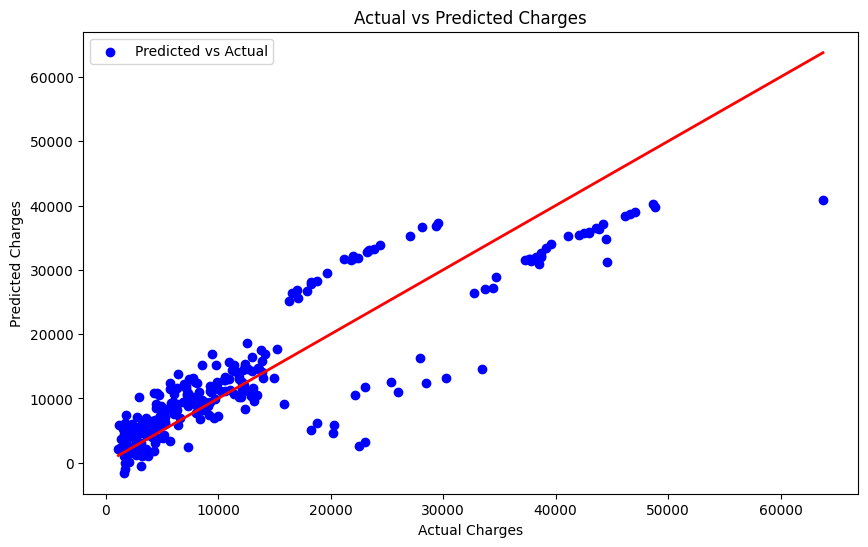

Model Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Model Intercept: -11931.21905032666
Mean Squared Error: 33596915.85136145
R-squared Score: 0.7835929767120724


In [ ]:
#3.Write a python code to predict the insurance charges to be paid by a person using a
#linear regression with multiple variables on the data given (insurance_data.csv).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
insurance_data_path = '/content/insurance_data - insurance_data.csv'
insurance_data = pd.read_csv(insurance_data_path)

# Display the first few rows of the dataset
print(insurance_data.head())

# One-hot encode categorical variables
insurance_data = pd.get_dummies(insurance_data, drop_first=True)

# Select features and target variable
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


    Year  Predicted GDP
0   1960       2.000000
1   1961       2.010050
2   1962       2.020201
3   1963       2.030455
4   1964       2.040811
5   1965       2.051271
6   1966       2.061837
7   1967       2.072508
8   1968       2.083287
9   1969       2.094174
10  1970       2.105171
11  1971       2.116278
12  1972       2.127497
13  1973       2.138828
14  1974       2.150274
15  1975       2.161834
16  1976       2.173511
17  1977       2.185305
18  1978       2.197217
19  1979       2.209250
20  1980       2.221403
21  1981       2.233678
22  1982       2.246077
23  1983       2.258600
24  1984       2.271249
25  1985       2.284025
26  1986       2.296930
27  1987       2.309964
28  1988       2.323130
29  1989       2.336427
30  1990       2.349859
31  1991       2.363425
32  1992       2.377128
33  1993       2.390968
34  1994       2.404948
35  1995       2.419068
36  1996       2.433329
37  1997       2.447735
38  1998       2.462285
39  1999       2.476981
40  2000       2

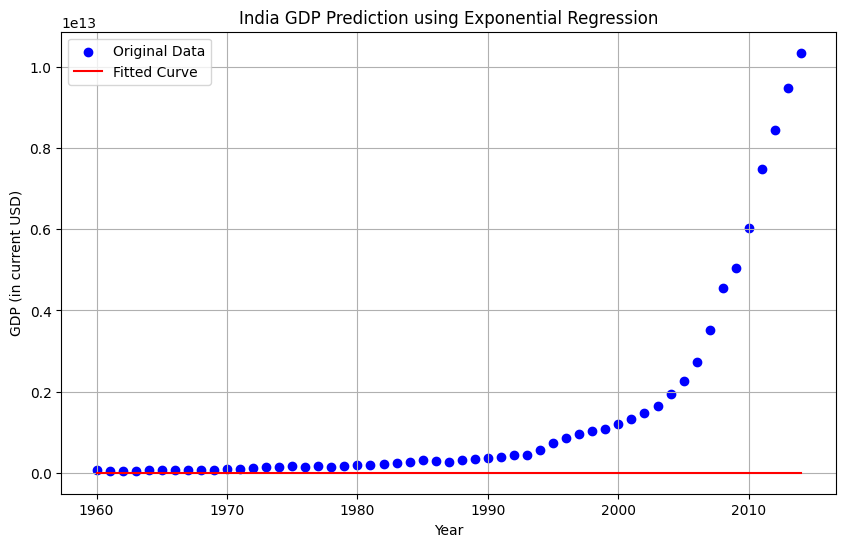

In [ ]:
#4.Write a python code to predict the GDP of India using a non-linear exponential
#regression model based on the data given (india_gdp.csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the dataset
file_path = '/content/india_gdp - india_gdp.csv'
data = pd.read_csv(file_path)

def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c

# Extract the year and GDP values
years = data['Year'].values
gdp_values = data['Value'].values

# Normalize the years for better numerical stability in the exponential model
years_normalized = years - years.min()

# Fit the exponential model to the data
params, covariance = curve_fit(exponential_model, years_normalized, gdp_values, p0=(1, 0.01, 1))

# Predict the GDP using the fitted model
predicted_gdp = exponential_model(years_normalized, *params)

# Print the predicted GDP values
predicted_gdp_output = pd.DataFrame({'Year': years, 'Predicted GDP': predicted_gdp})
print(predicted_gdp_output)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(years, gdp_values, color='blue', label='Original Data')
plt.plot(years, predicted_gdp, color='red', label='Fitted Curve')
plt.xlabel('Year')
plt.ylabel('GDP (in current USD)')
plt.title('India GDP Prediction using Exponential Regression')
plt.legend()
plt.grid(True)
plt.show()
